In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/competitions/goodreads-books-reviews-290312/data")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: saitejabandaru
Your Kaggle Key: ··········


100%|██████████| 635M/635M [00:16<00:00, 41.3MB/s]



Extracting archive ./goodreads-books-reviews-290312/goodreads-books-reviews-290312.zip to ./goodreads-books-reviews-290312


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import csv
import re 
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
train_df = pd.read_csv("/content/goodreads-books-reviews-290312/goodreads_train.csv")
test_df = pd.read_csv("/content/goodreads-books-reviews-290312/goodreads_test.csv")

In [ ]:
print(len(train_df))
print(len(test_df))
train_df

900000
478033


,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1
...,...,...,...,...,...,...,...,...,...,...,...
899995,b9450d1c1f97f891c392b1105959b56e,11832081,7c34c15ad8cb28a4afca32946e2016ea,3,3.5 stars. \n Jenna is a popular YA author and...,Fri Nov 16 22:10:17 -0800 2012,Sat Nov 17 22:42:44 -0800 2012,Sat Nov 17 00:00:00 -0800 2012,Fri Nov 16 00:00:00 -0800 2012,0,0
899996,b9450d1c1f97f891c392b1105959b56e,16095092,e979c735276431915d089cfaf446d64f,3,This was a quick read for me. I have read a lo...,Fri Nov 16 22:09:49 -0800 2012,Sat Nov 17 23:38:58 -0800 2012,Sat Nov 17 00:00:00 -0800 2012,Fri Nov 16 00:00:00 -0800 2012,1,1
899997,b9450d1c1f97f891c392b1105959b56e,8430896,feb9fe6439f9fbba8a1cce36020ad977,4,** spoiler alert ** \n 3.5 stars. \n This book...,Tue Nov 13 05:38:24 -0800 2012,Tue Nov 13 23:29:17 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,1,0
899998,b9450d1c1f97f891c392b1105959b56e,12275680,741e29369f70531bfffbd02add86f228,4,** spoiler alert ** \n Another fun read from M...,Mon Nov 12 05:42:30 -0800 2012,Tue Nov 13 22:32:05 -0800 2012,Tue Nov 13 00:00:00 -0800 2012,Mon Nov 12 00:00:00 -0800 2012,0,0


<Axes: xlabel='rating', ylabel='count'>

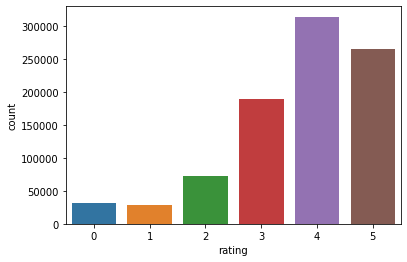

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = train_df.rating)


In [ ]:
train_df.isna().sum()

user_id              0
book_id              0
review_id            0
rating               0
review_text          0
date_added           0
date_updated         0
read_at          91766
started_at      274297
n_votes              0
n_comments           0
dtype: int64

In [ ]:
test_df.isna().sum()

user_id              0
book_id              0
review_id            0
review_text          0
date_added           0
date_updated         0
read_at          42478
started_at      143044
n_votes              0
n_comments           0
dtype: int64

In [ ]:
common_df = pd.concat([train_df.review_text, test_df.review_text]).reset_index(drop = True)
common_df

0          This is a special book. It started slow for ab...
1          Recommended by Don Katz. Avail for free in Dec...
2          A fun, fast paced science fiction thriller. I ...
3          Recommended reading to understand what is goin...
4          I really enjoyed this book, and there is a lot...
                                 ...                        
1378028    Can't wait for Travis' POV \n Travis Before Ab...
1378029    Had this on my to-read shelf forever. Will upd...
1378030    The last book left me wanting for more. I need...
1378031    Things are heating up in the second novel of I...
1378032    Before I even start this review, I must say th...
Name: review_text, Length: 1378033, dtype: object

In [ ]:
# to lower
def to_lower(text):
    return text.lower()

In [ ]:
#remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re
from urllib.parse import urlparse

def remove_url(text):
    url = re.compile(r'https?://\S+')
    return url.sub(r'',text)

print('Example:\n' + common_df[10])

Example:
A beautiful story. Neil Gaiman is truly a unique storyteller. I did a combo of reading and listening to this story, and Neil is great at reading as well. I got interested in this book after seeing the movie, which I really enjoyed. The book is similar - maybe a bit more poetic - but I think the plot in the movie is a bit improved (not much, but a bit). 
 I imagine this book came about because Neil read the below poem that he includes in the beginning, and then he invented a plot around it. The result is the book reads like a epic poem - it's creative, magical, and really, just right. 
 Go and catch a falling star, 
 Get with child a mandrake root, 
 Tell me where all past years are, 
 Or who cleft the devil's foot, 
 Teach me to hear mermaids singing, 
 Or to keep off envy's stinging, 
 And find 
 What wind 
 Serves to advance an honest mind. 
 If thou be'st born to strange sights, 
 Things invisible to see, 
 Ride ten thousand days and nights, 
 Till age snow white hairs on t

In [ ]:
import string
remove = string.punctuation

period = '.'
remove = remove.replace(period, '')

def remove_punctuation(text):
    pattern = re.compile(r"[{}]".format(re.escape(remove)))
    
    res = []
    for word in text.split():
        
        # remove all punctiations except periods
        new_word = pattern.sub(r' ', word)
        new_word = new_word.strip(period)
        
        try:
            float(new_word)
        except:
            new_word = new_word.replace(period, ' ')
            
        res.append(new_word)
    
    return ' '.join(res)

In [ ]:
def remove_quotes(text):
    alpha = re.compile(r'"([^"\\]|\\.)*"') 
    return alpha.sub(r' ', text)

In [ ]:
def remove_spoiler_alert(text):
    spoiler = re.compile(r'(\(view spoiler\).*?\(hide spoiler\))') 
    return spoiler.sub(r' ', text)

In [ ]:
MAX_LEN = 100


In [ ]:
def process_text(text):
    text = to_lower(text)
    text = remove_url(text)
    text = remove_punctuation(text)   
    # take only first MAX_LEN words
    text = ' '.join(text.split()[:MAX_LEN])
    return text

In [ ]:
common_df = common_df.apply(process_text)

# check min number of words
common_df.apply(lambda x : len(x.split())).min()


1

In [ ]:
# check if train set has null values 
train = common_df.iloc[:len(train_df)].set_axis(train_df.index)
train_df.loc[train[train == ''].index]

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments


In [ ]:
# check if text set has null values 
test = common_df.iloc[-len(test_df):].set_axis(test_df.index)
test_df.loc[test[test == ''].index]

,user_id,book_id,review_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments


LEMETIZATION


In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatization(text):
    return ' '.join(wordnet_lemmatizer.lemmatize(word) for word in text.split()) # all words are considered as noun

In [ ]:
import nltk
nltk.download('wordnet')
common_df = common_df.apply(lemmatization)


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
common_df[3]


'recommended reading to understand what is going on in middle america and possibly better explain why trump won'

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

y = to_categorical(train_df['rating'])
y.shape


(900000, 6)

In [ ]:
train_df['rating'].unique()

array([5, 3, 0, 4, 2, 1])

SPLIT DATASET INTO TRAIN AND TEST

In [ ]:
X = common_df.iloc[:y.shape[0]]
X_test = common_df.iloc[y.shape[0]:]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.15, random_state = 42)


In [ ]:
X_train.head()

839450    i wa laughing so hard because of opal the poor...
780957    oh bridget enjoyable but not really the same w...
26196     you know life is good when you re in serious s...
52648     not bad not bad although with some minor setba...
881175    wow that s really all i can manage to say righ...
Name: review_text, dtype: object

In [ ]:
y_train[:5]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

LSTM


In [ ]:
#tokensization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train) # fit tokenizer only on train data

vocab_size = len(tokenizer.word_index)
vocab_size

154595

In [ ]:
train_sequence = tokenizer.texts_to_sequences(X_train)
train_sequence = pad_sequences(train_sequence, maxlen = MAX_LEN, padding = 'post')

val_sequence = tokenizer.texts_to_sequences(X_val)
val_sequence = pad_sequences(val_sequence, maxlen = MAX_LEN, padding = 'post')

test_sequence = tokenizer.texts_to_sequences(X_test)
test_sequence = pad_sequences(test_sequence, maxlen = MAX_LEN, padding = 'post')

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, SpatialDropout1D, LSTM, Embedding

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
early_stop = EarlyStopping(patience = 4, restore_best_weights = True, verbose = 1) # val_loss
reduce_lr = ReduceLROnPlateau(factor = 0.1, patience = 2, mode = 'min', verbose = 1) # val_loss

In [ ]:
model=Sequential()
model.add(Embedding(vocab_size + 1, 50, input_length = MAX_LEN))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(6,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           7729800   
                                                                 
 spatial_dropout1d (SpatialD  (None, 100, 50)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               60400     
                                                                 
 dense (Dense)               (None, 6)                 606       
                                                                 
Total params: 7,790,806
Trainable params: 7,790,806
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit the model
history = model.fit(train_sequence, 
                    y_train, 
                    batch_size = 64,
                    epochs = 2,
                    verbose = 1,
                    validation_data = (val_sequence, y_val),
                    callbacks = [reduce_lr, early_stop])

Epoch 1/2
11954/11954 [==============================] - 2956s 247ms/step - loss: 1.2479 - accuracy: 0.4607 - val_loss: 1.0815 - val_accuracy: 0.5369 - lr: 0.0010
Epoch 2/2
11954/11954 [==============================] - 2996s 251ms/step - loss: 1.0523 - accuracy: 0.5519 - val_loss: 1.0363 - val_accuracy: 0.5587 - lr: 0.0010


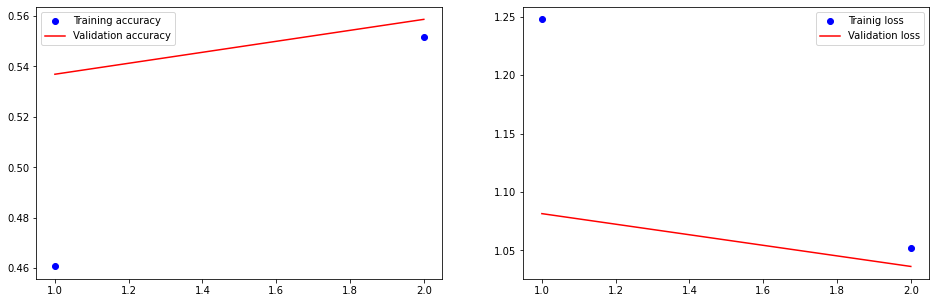

In [ ]:
loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(16, 5))
#accuracy
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.legend()

#loss
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'bo', label = 'Trainig loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.legend()

plt.show()

In [ ]:
sub = pd.DataFrame()
sub['review_id'] = test_df.review_id
sub['rating'] = [np.argmax(i) for i in model.predict(test_sequence)]
sub.head()

14939/14939 [==============================] - 374s 25ms/step


,review_id,rating
0,5c4df7e70e9b438c761f07a4620ccb7c,5
1,8eaeaf13213eeb16ad879a2a2591bbe5,4
2,dce649b733c153ba5363a0413cac988f,4
3,8a46df0bb997269d6834f9437a4b0a77,4
4,d11d3091e22f1cf3cb865598de197599,3


In [ ]:
sub.to_csv('goodreads_submission.csv', header=True, index=False)